[link text](https://)## Letter Identify

The objective of this model is to differentiate all the 26 letters of english alfabet.

## Step 1: Downloading the necessary images


In [3]:
# !pip install -Uqq duckduckgo_search
from fastai.vision.widgets import *

In [4]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from time import sleep

def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

Array with all letters

In [5]:
Letters_array = [chr(i) for i in range(ord('A'), ord('Z') + 1)]
Letters_dict = {letter: f'Letter {letter}' for letter in Letters_array}

In [6]:
Letters_dict

{'A': 'Letter A',
 'B': 'Letter B',
 'C': 'Letter C',
 'D': 'Letter D',
 'E': 'Letter E',
 'F': 'Letter F',
 'G': 'Letter G',
 'H': 'Letter H',
 'I': 'Letter I',
 'J': 'Letter J',
 'K': 'Letter K',
 'L': 'Letter L',
 'M': 'Letter M',
 'N': 'Letter N',
 'O': 'Letter O',
 'P': 'Letter P',
 'Q': 'Letter Q',
 'R': 'Letter R',
 'S': 'Letter S',
 'T': 'Letter T',
 'U': 'Letter U',
 'V': 'Letter V',
 'W': 'Letter W',
 'X': 'Letter X',
 'Y': 'Letter Y',
 'Z': 'Letter Z'}

Download examples to final analize

In [7]:
for letter in Letters_dict.values():
  download_url(search_images(letter, max_images=1)[0], f'{letter}.jpg', show_progress=True)
  sleep(5)


/home/luismarques/Documents/IA/fastaiOnCampus/.venv/lib/python3.11/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


### Downloading search result images for Dataset

In [8]:
path = Path('letters array')


for o in Letters_array:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} Letter'))
    sleep(3)
    download_images(dest, urls=search_images(f'letter {o} Font'))
    sleep(2)
    resize_images(path/o, max_size=500, dest=path/o)

/home/luismarques/Documents/IA/fastaiOnCampus/.venv/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/luismarques/Documents/IA/fastaiOnCampus/.venv/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/luismarques/Documents/IA/fastaiOnCampus/.venv/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/luismarques/Documents/IA/fastaiOnCampus/.venv/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/luismarques/Documents/IA/fastaiOnCampus/.venv/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Tran

## Step 2: Train our model

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

132

First we create the DataBlock

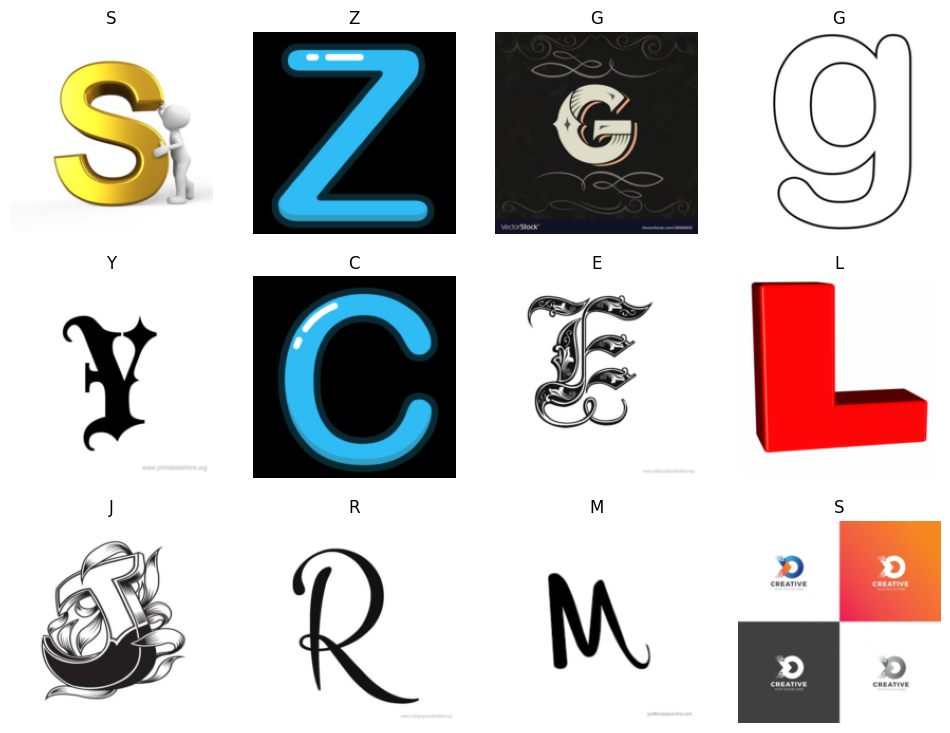

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=12)

And secont we make the learner in the models, to this project I select the

In [ ]:
learn = vision_learner(dls, resnet152, metrics=error_rate)
learn.fine_tune(15)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:05<00:00, 41.5MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,3.253455,2.059015,0.551240,01:09


epoch,train_loss,valid_loss,error_rate,time
0,1.484679,1.129780,0.323967,01:26
1,0.918447,1.015467,0.263636,01:26
2,0.663594,1.021732,0.251240,01:26
3,0.514584,1.209740,0.277686,01:26
4,0.415884,0.913237,0.221488,01:26
5,0.314711,0.883416,0.205785,01:26
6,0.244233,0.850895,0.196694,01:25
7,0.194655,0.817989,0.186777,01:26
8,0.165117,0.785984,0.180165,01:26
9,0.139841,0.762679,0.169421,01:25


## Step 3: Using the model

Let's see some example tests of what are model thinks and the actual result:

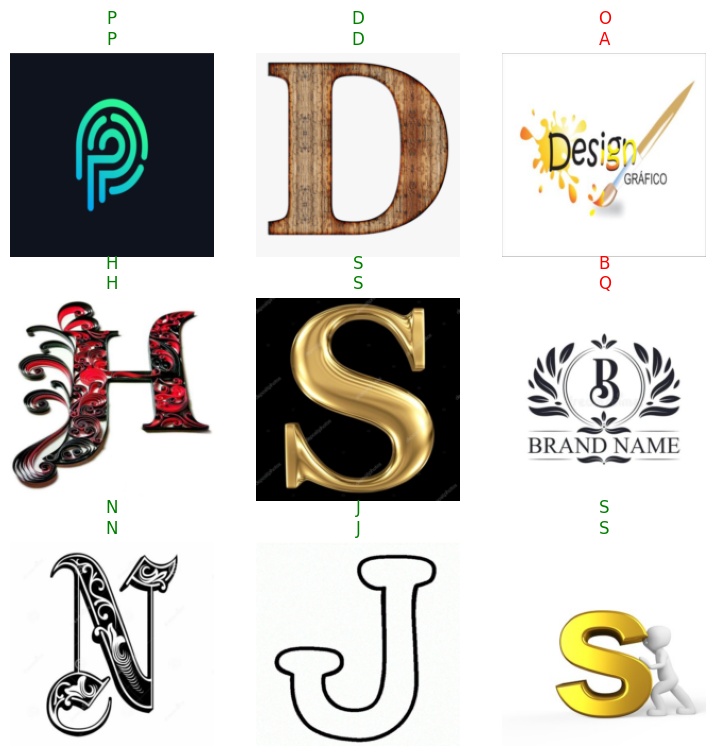

In [ ]:
learn.show_results(max_n=9)

### Cleaning Up
Here we have the opportunity to improve our dataset by removing images that don't match our topic or relabel images that may have been mislabeled.

In [20]:
cleaner = ImageClassifierCleaner(learn)

cleaner

### Testing
Now we'll train our model on the previous example images to check if it's getting the results correctly.

In [ ]:
learn.export("letter_identify_model.pkl")

## The runtime results

Using the runtime T4 of google runtime, to traning the model, the use of GPU and Ram of system had do:
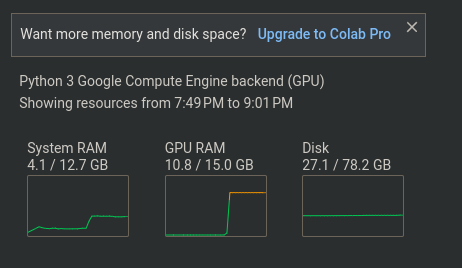

# Give it a shot!
The model related to this article has been deployed on the following link in hugging face .Just click [here!](https://huggingface.co/spaces/fastaioncampus/Identify_letter)
